<a href="https://colab.research.google.com/github/Nov05/DS-Unit-1-Sprint-1-Dealing-With-Data/blob/master/module2-loadingdata/LS_DS_112_Loading_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Changed by Nov05 on 2019-05-28

# Lambda School Data Science - Loading, Cleaning and Visualizing Data

Objectives for today:
- Load data from multiple sources into a Python notebook 
 - !curl method
 - CSV upload method
- Create basic plots appropriate for different data types
 - Scatter Plot
 - Histogram
 - Density Plot
 - Pairplot
- "Clean" a dataset using common Python libraries
 - Removing NaN values "Interpolation"

# Part 1 - Loading Data

Data comes in many shapes and sizes - we'll start by loading tabular data, usually in csv format.

Data set sources:

- https://archive.ics.uci.edu/ml/index.php
- https://github.com/awesomedata/awesome-public-datasets
- https://registry.opendata.aws/ (beyond scope for now, but good to be aware of)

Let's start with an example - [data about flags](https://archive.ics.uci.edu/ml/datasets/Flags).

## Lecture example - flag data

In [0]:
# Step 1 - find the actual file to download

# From navigating the page, clicking "Data Folder"

# data sourse: https://archive.ics.uci.edu/ml/datasets/Wine+Quality
red_data_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv'
white_data_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv'
names_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality.names'

# You can "shell out" in a notebook for more powerful tools
# https://jakevdp.github.io/PythonDataScienceHandbook/01.05-ipython-and-shell-commands.html

# Extensions are just a norm! You have to inspect to be sure what something is

In [0]:
# Funny extension, but on inspection looks like a csv
!curl https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv

In [13]:
# Step 2 - load the data

# How to deal with a csv? 🐼
import pandas as pd
red_data = pd.read_csv(red_data_url, sep=';')
red_data.shape 

(1599, 12)

In [18]:
white_data = pd.read_csv(white_data_url, sep=';')
white_data.shape # Number of Instances: 4898

(4898, 12)

In [0]:
Red wine data and white wine data seem uneven.

In [8]:
# Step 3 - verify we've got *something*
red_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [11]:
# Step 4 - Looks a bit odd - verify that it is what we want
red_data.count()

fixed acidity           1599
volatile acidity        1599
citric acid             1599
residual sugar          1599
chlorides               1599
free sulfur dioxide     1599
total sulfur dioxide    1599
density                 1599
pH                      1599
sulphates               1599
alcohol                 1599
quality                 1599
dtype: int64

In [19]:
!curl https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv | wc

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 84199  100 84199    0     0   321k      0 --:--:-- --:--:-- --:--:--  321k
   1600    1608   84199


In [0]:
# So we have 193 observations with funny names, file has 194 rows
# Looks like the file has no header row, but read_csv assumes it does
help(pd.read_csv)

Help on function read_csv in module pandas.io.parsers:

read_csv(filepath_or_buffer, sep=',', delimiter=None, header='infer', names=None, index_col=None, usecols=None, squeeze=False, prefix=None, mangle_dupe_cols=True, dtype=None, engine=None, converters=None, true_values=None, false_values=None, skipinitialspace=False, skiprows=None, skipfooter=0, nrows=None, na_values=None, keep_default_na=True, na_filter=True, verbose=False, skip_blank_lines=True, parse_dates=False, infer_datetime_format=False, keep_date_col=False, date_parser=None, dayfirst=False, iterator=False, chunksize=None, compression='infer', thousands=None, decimal=b'.', lineterminator=None, quotechar='"', quoting=0, doublequote=True, escapechar=None, comment=None, encoding=None, dialect=None, tupleize_cols=None, error_bad_lines=True, warn_bad_lines=True, delim_whitespace=False, low_memory=True, memory_map=False, float_precision=None)
    Read a comma-separated values (csv) file into DataFrame.
    
    Also supports option

In [0]:
?pd.read_csv

In [0]:
??pd.read_csv

In [23]:
# Alright, we can pass header=None to fix this
temp = pd.read_csv(red_data_url, sep=';', header=None)
temp.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1,7.4,0.7,0,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5
2,7.8,0.88,0,2.6,0.098,25,67,0.9968,3.2,0.68,9.8,5
3,7.8,0.76,0.04,2.3,0.092,15,54,0.997,3.26,0.65,9.8,5
4,11.2,0.28,0.56,1.9,0.075,17,60,0.998,3.16,0.58,9.8,6


In [25]:
red_data.count()

fixed acidity           1599
volatile acidity        1599
citric acid             1599
residual sugar          1599
chlorides               1599
free sulfur dioxide     1599
total sulfur dioxide    1599
density                 1599
pH                      1599
sulphates               1599
alcohol                 1599
quality                 1599
dtype: int64

In [26]:
red_data.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

### Yes, but what does it *mean*?

This data is fairly nice - it was "donated" and is already "clean" (no missing values). But there are no variable names - so we have to look at the codebook (also from the site).

```
**Attribute Information:**  
For more information, read [Cortez et al., 2009].   

Input variables (based on physicochemical tests):   
1 - fixed acidity   
2 - volatile acidity   
3 - citric acid   
4 - residual sugar   
5 - chlorides   
6 - free sulfur dioxide   
7 - total sulfur dioxide   
8 - density   
9 - pH   
10 - sulphates   
11 - alcohol   

Output variable (based on sensory data):   
12 - quality (score between 0 and 10)  
```

Exercise - read the help for `read_csv` and figure out how to load the data with the above variable names. One pitfall to note - with `header=None` pandas generated variable names starting from 0, but the above list starts from 1...

## Loading from a local CSV to Google Colab

In [37]:
from google.colab import files
uploaded = files.upload()

Saving winequality.names to winequality (1).names


In [38]:
type(uploaded)

dict

In [54]:
for key, val in uploaded.items():
  print(key)
  print(val.decode())

winequality.names
Citation Request:
  This dataset is public available for research. The details are described in [Cortez et al., 2009]. 
  Please include this citation if you plan to use this database:

  P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis. 
  Modeling wine preferences by data mining from physicochemical properties.
  In Decision Support Systems, Elsevier, 47(4):547-553. ISSN: 0167-9236.

  Available at: [@Elsevier] http://dx.doi.org/10.1016/j.dss.2009.05.016
                [Pre-press (pdf)] http://www3.dsi.uminho.pt/pcortez/winequality09.pdf
                [bib] http://www3.dsi.uminho.pt/pcortez/dss09.bib

1. Title: Wine Quality 

2. Sources
   Created by: Paulo Cortez (Univ. Minho), Antonio Cerdeira, Fernando Almeida, Telmo Matos and Jose Reis (CVRVV) @ 2009
   
3. Past Usage:

  P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis. 
  Modeling wine preferences by data mining from physicochemical properties.
  In Decision Support Systems, Elsevier, 47(4):

In [61]:
# Colab doesn't care about file extensions, or set a default encoding.
from google.colab import files
uploaded = files.upload()
for key, val in uploaded.items():
  print(key)
  print(val)

Saving winequality-red.csv to winequality-red.csv
winequality-red.csv
b'"fixed acidity";"volatile acidity";"citric acid";"residual sugar";"chlorides";"free sulfur dioxide";"total sulfur dioxide";"density";"pH";"sulphates";"alcohol";"quality"\n7.4;0.7;0;1.9;0.076;11;34;0.9978;3.51;0.56;9.4;5\n7.8;0.88;0;2.6;0.098;25;67;0.9968;3.2;0.68;9.8;5\n7.8;0.76;0.04;2.3;0.092;15;54;0.997;3.26;0.65;9.8;5\n11.2;0.28;0.56;1.9;0.075;17;60;0.998;3.16;0.58;9.8;6\n7.4;0.7;0;1.9;0.076;11;34;0.9978;3.51;0.56;9.4;5\n7.4;0.66;0;1.8;0.075;13;40;0.9978;3.51;0.56;9.4;5\n7.9;0.6;0.06;1.6;0.069;15;59;0.9964;3.3;0.46;9.4;5\n7.3;0.65;0;1.2;0.065;15;21;0.9946;3.39;0.47;10;7\n7.8;0.58;0.02;2;0.073;9;18;0.9968;3.36;0.57;9.5;7\n7.5;0.5;0.36;6.1;0.071;17;102;0.9978;3.35;0.8;10.5;5\n6.7;0.58;0.08;1.8;0.097;15;65;0.9959;3.28;0.54;9.2;5\n7.5;0.5;0.36;6.1;0.071;17;102;0.9978;3.35;0.8;10.5;5\n5.6;0.615;0;1.6;0.089;16;59;0.9943;3.58;0.52;9.9;5\n7.8;0.61;0.29;1.6;0.114;9;29;0.9974;3.26;1.56;9.1;5\n8.9;0.62;0.18;3.8;0.176;52;14

# Part 2 - Basic Visualizations

## Basic Data Visualizations Using Matplotlib

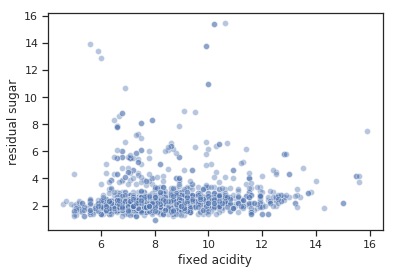

In [82]:
import seaborn as sns
sns.scatterplot(red_data["fixed acidity"], red_data["residual sugar"], alpha=0.4);

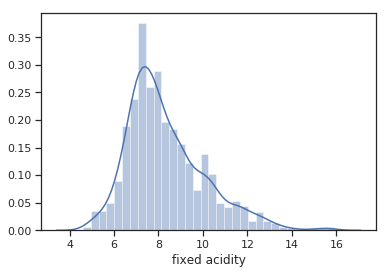

In [85]:
# Histogram
sns.distplot(red_data["fixed acidity"]);

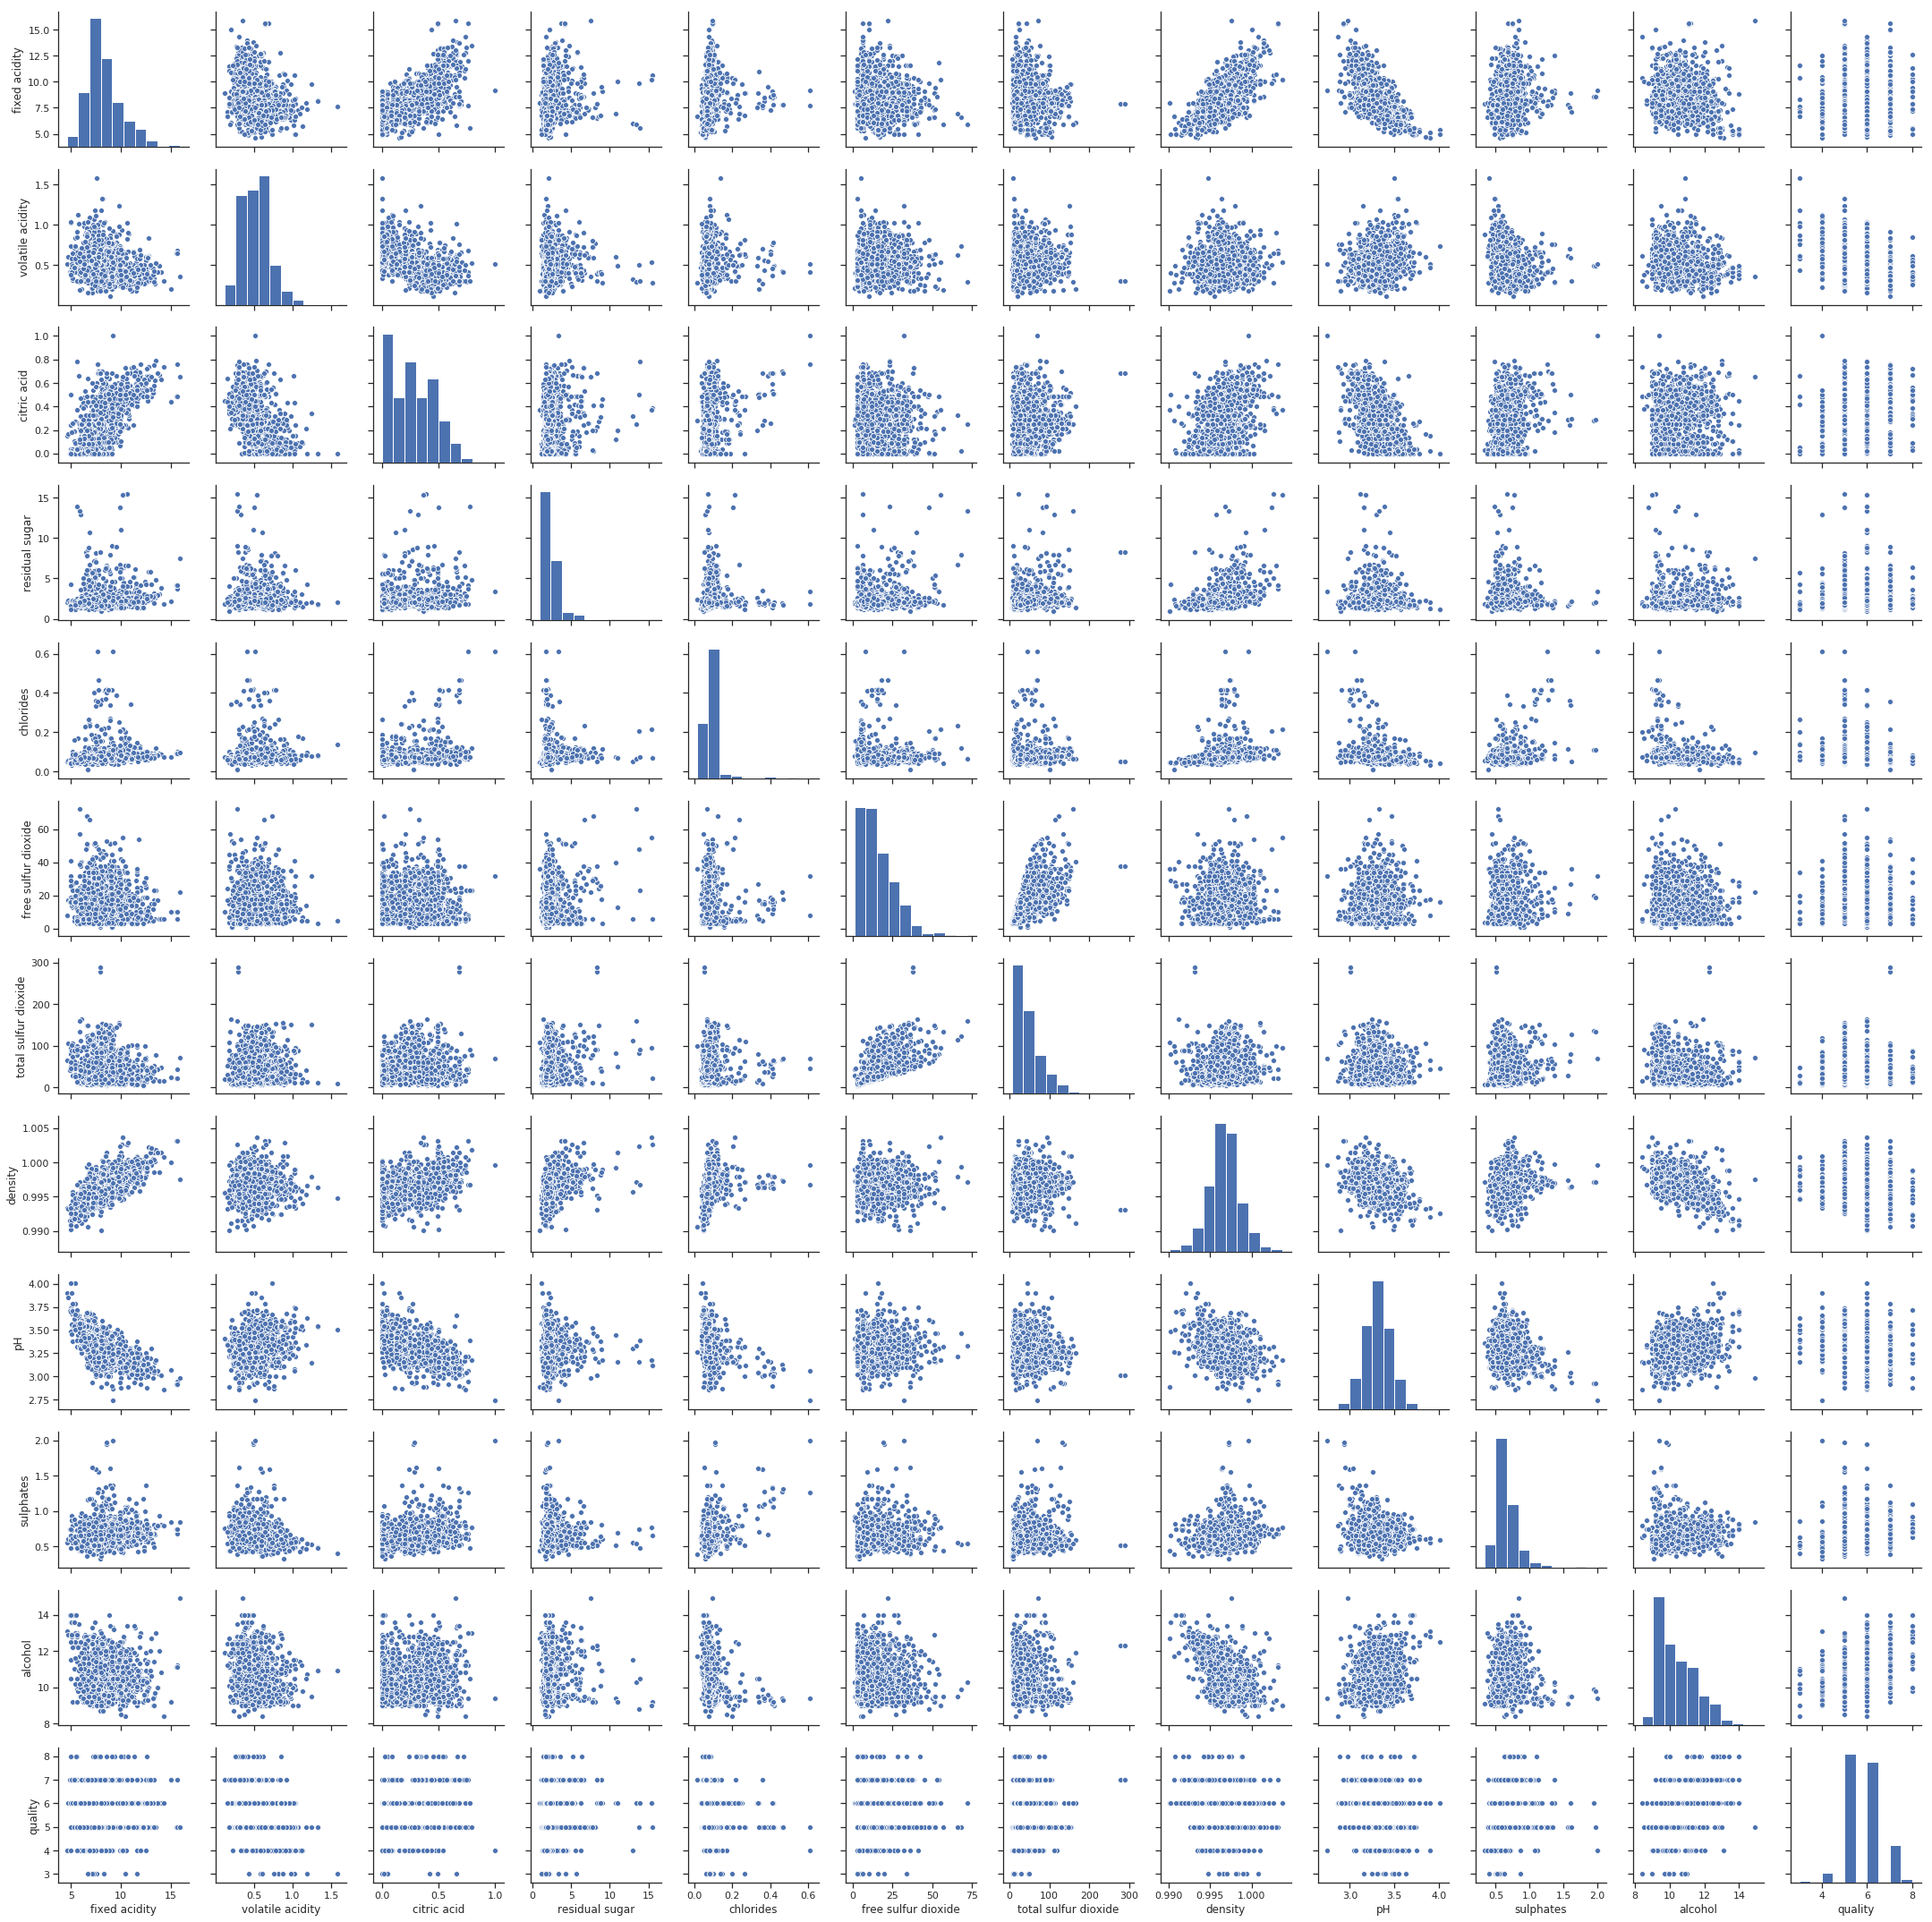

In [53]:
# Seaborn Pairplot
sns.set(style='ticks', color_codes=True)
graph = sns.pairplot(red_data)

## Create the same basic Visualizations using Pandas

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


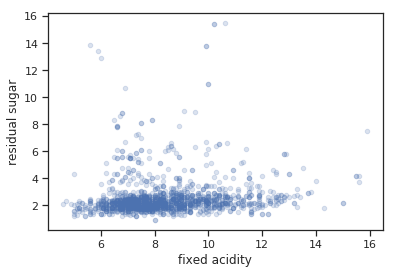

In [66]:
import matplotlib.pyplot as plt

# Scatter Plot
red_data.plot.scatter('fixed acidity', 'residual sugar', alpha=0.2);

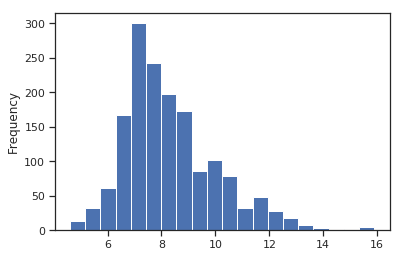

In [142]:
# Pandas Histogram - Look familiar?
red_data['fixed acidity'].plot.hist(bins=20);

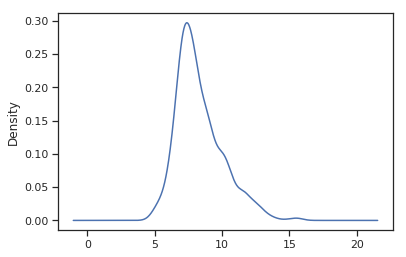

In [62]:
# pandas density plot
red_data['fixed acidity'].plot.density();

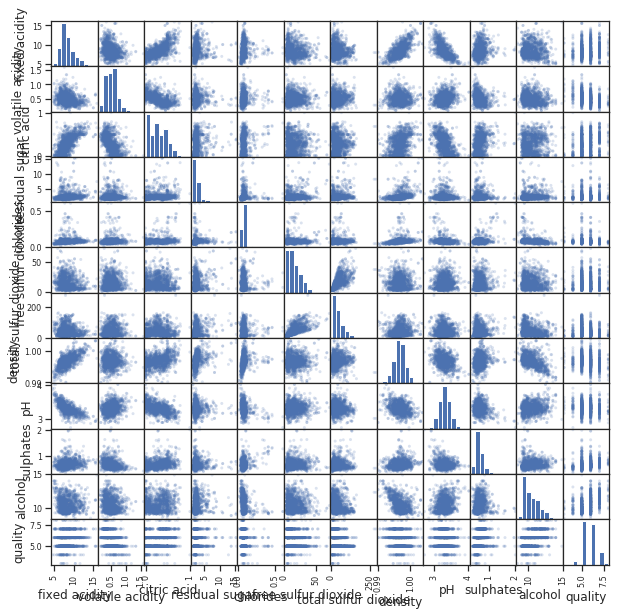

In [86]:
# Pandas Scatter Matrix - Usually doesn't look too great.
pd.plotting.scatter_matrix(red_data, alpha=0.2, figsize=(10, 10))
plt.show()

# Part 3 - Deal with Missing Values

## Diagnose Missing Values

Lets use the Adult Dataset from UCI. <https://github.com/ryanleeallred/datasets>

In [0]:
# NOTE: this url won't work. 'https://github.com/ryanleeallred/datasets/blob/master/adult.csv'
adult_data = pd.read_csv('https://github.com/ryanleeallred/datasets/raw/master/adult.csv')

In [95]:
adult_data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [96]:
adult_data.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
country           0
salary            0
dtype: int64

In [101]:
adult_data.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [106]:
adult_data.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
country           object
salary            object
dtype: object

In [108]:
adult_data.describe(include=['object', 'category'])

,workclass,education,marital-status,occupation,relationship,race,sex,country,salary
count,32561,32561,32561,32561,32561,32561,32561,32561,32561
unique,9,16,7,15,6,5,2,42,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,22696,10501,14976,4140,13193,27816,21790,29170,24720


In [122]:
for col, dtype in enumerate(adult_data.dtypes):
  if dtype == 'object':
    print(adult_data.iloc[:, col].unique())

[' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 ' ?' ' Self-emp-inc' ' Without-pay' ' Never-worked']
[' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th']
[' Never-married' ' Married-civ-spouse' ' Divorced'
 ' Married-spouse-absent' ' Separated' ' Married-AF-spouse' ' Widowed']
[' Adm-clerical' ' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Sales' ' Craft-repair' ' Transport-moving'
 ' Farming-fishing' ' Machine-op-inspct' ' Tech-support' ' ?'
 ' Protective-serv' ' Armed-Forces' ' Priv-house-serv']
[' Not-in-family' ' Husband' ' Wife' ' Own-child' ' Unmarried'
 ' Other-relative']
[' White' ' Black' ' Asian-Pac-Islander' ' Amer-Indian-Eskimo' ' Other']
[' Male' ' Female']
[' United-States' ' Cuba' ' Jamaica' ' India' ' ?' ' Mexico' ' South'
 ' Puerto-Rico' ' Honduras' ' England' ' Canada' ' Germany' 

In [0]:
# read csv again, remove ' ?'
# why can't use delim_whitespace=True here?
adult_data = pd.read_csv('https://github.com/ryanleeallred/datasets/raw/master/adult.csv', na_values=' ?')

**Obviously we need to trim whitespaces.**

In [0]:
# trim whitespaces
adult_data = adult_data.apply(lambda x: x.str.strip() if x.dtype == "object" else x)

In [164]:
for col, dtype in enumerate(adult_data.dtypes):
  if (dtype == 'object'):
    print(adult_data.iloc[:, col].unique())

['State-gov' 'Self-emp-not-inc' 'Private' 'Federal-gov' 'Local-gov' nan
 'Self-emp-inc' 'Without-pay' 'Never-worked']
['Bachelors' 'HS-grad' '11th' 'Masters' '9th' 'Some-college' 'Assoc-acdm'
 'Assoc-voc' '7th-8th' 'Doctorate' 'Prof-school' '5th-6th' '10th'
 '1st-4th' 'Preschool' '12th']
['Never-married' 'Married-civ-spouse' 'Divorced' 'Married-spouse-absent'
 'Separated' 'Married-AF-spouse' 'Widowed']
['Adm-clerical' 'Exec-managerial' 'Handlers-cleaners' 'Prof-specialty'
 'Other-service' 'Sales' 'Craft-repair' 'Transport-moving'
 'Farming-fishing' 'Machine-op-inspct' 'Tech-support' nan
 'Protective-serv' 'Armed-Forces' 'Priv-house-serv']
['Not-in-family' 'Husband' 'Wife' 'Own-child' 'Unmarried' 'Other-relative']
['White' 'Black' 'Asian-Pac-Islander' 'Amer-Indian-Eskimo' 'Other']
['Male' 'Female']
['United-States' 'Cuba' 'Jamaica' 'India' nan 'Mexico' 'South'
 'Puerto-Rico' 'Honduras' 'England' 'Canada' 'Germany' 'Iran'
 'Philippines' 'Italy' 'Poland' 'Columbia' 'Cambodia' 'Thailand' '

## Fill Missing Values

In [137]:
adult_data.isna().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
country            583
salary               0
dtype: int64

In [0]:
# There are a lot of '?' values.
adult_data = adult_data.fillna(method='ffill');

In [139]:
adult_data.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
country           0
salary            0
dtype: int64

## Your assignment - pick a dataset and do something like the above

This is purposely open-ended - you can pick any data set you wish. It is highly advised you pick a dataset from UCI or a similar semi-clean source. You don't want the data that you're working with for this assignment to have any bigger issues than maybe not having headers or including missing values, etc.

After you have chosen your dataset, do the following:

- Import the dataset using the method that you are least comfortable with (!curl or CSV upload).
 - Make sure that your dataset has the number of rows and columns that you expect.
 - Make sure that your dataset has appropriate column names, rename them if necessary.
 - If your dataset uses markers like "?" to indicate missing values, replace them with NaNs during import.
- Identify and fill missing values in your dataset (if any)
 - Don't worry about using methods more advanced than the `.fillna()` function for today.
- Create one of each of the following plots using your dataset
 - Scatterplot
 - Histogram
 - Density Plot
 - Pairplot (note that pairplots will take a long time to load with large datasets or datasets with many columns)

If you get that done and want to try more challenging or exotic things, go for it! Use documentation as illustrated above, and follow the 20-minute rule (that is - ask for help if you're stuck!).

If you have loaded a few traditional datasets, see the following section for suggested stretch goals.

In [0]:
# TODO your work here!
# And note you should write comments, descriptions, and add new
# code and text blocks as needed

# read concrete data csv
concrete_data = pd.read_csv('https://github.com/ryanleeallred/datasets/raw/master/concrete_data.csv')

In [144]:
# check whether header is right
concrete_data.head()

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [146]:
# check whether shape is right: 1030 rows, 9 columns
# http://archive.ics.uci.edu/ml/datasets/concrete+compressive+strength
concrete_data.shape

(1030, 9)

In [149]:
concrete_data.isna().sum()

cement                           0
blast_furnace_slag               0
fly_ash                          0
water                            0
superplasticizer                 0
coarse_aggregate                 0
fine_aggregate                   0
age                              0
concrete_compressive_strength    0
dtype: int64

In [153]:
# check data types: all columns are numeric
concrete_data.dtypes

cement                           float64
blast_furnace_slag               float64
fly_ash                          float64
water                            float64
superplasticizer                 float64
coarse_aggregate                 float64
fine_aggregate                   float64
age                                int64
concrete_compressive_strength    float64
dtype: object

In [154]:
# lucky there is no need to fill NAs
concrete_data.isna().sum()

cement                           0
blast_furnace_slag               0
fly_ash                          0
water                            0
superplasticizer                 0
coarse_aggregate                 0
fine_aggregate                   0
age                              0
concrete_compressive_strength    0
dtype: int64

In [168]:
# check how many zero values are there in each columns
concrete_data.shape[0] - concrete_data.astype(bool).sum(axis=0)

cement                             0
blast_furnace_slag               471
fly_ash                          566
water                              0
superplasticizer                 379
coarse_aggregate                   0
fine_aggregate                     0
age                                0
concrete_compressive_strength      0
dtype: int64

In [0]:
# check those 3 columns that contain zeros
# http://archive.ics.uci.edu/ml/datasets/concrete+compressive+strength

# Blast Furnace Slag (component 2) -- quantitative -- kg in a m3 mixture -- Input Variable 
# Fly Ash (component 3) -- quantitative -- kg in a m3 mixture -- Input Variable
# Superplasticizer (component 5) -- quantitative -- kg in a m3 mixture -- Input Variable 

# According to the column descriptions, zeros should be considered missing values
# Since the total row number is 1030, those 3 columns have high percentage of fields without a value

In [256]:
from statistics import median 
from statistics import mean

# non-zero fields medians and means
for col_index in range(concrete_data.shape[1]):
  if (col_index in [1, 2, 4]):
    col_val = concrete_data.iloc[:, col_index]
    col_val = col_val.iloc[col_val.to_numpy().nonzero()[0]] # remove zero-value fields
    print(median(col_val), mean(col_val))

135.7 136.15867620751342
121.4 120.28879310344827
9.4 9.816897081413211


In [257]:
# orginal medians and means
for col_index in range(concrete_data.shape[1]):
  if (col_index in [1, 2, 4]):
    col_val = concrete_data.iloc[:, col_index]
    print(median(col_val), '\t', mean(col_val))

22.0 	 73.89582524271844
0.0 	 54.18834951456311
6.4 	 6.204660194174758


In [0]:
# almost half of the fields are zeros, so fill missing values with median of non-zero fields?
# or simply don't use fields without a value? Well, just fill them for coding excercise

# fill with median
for col_index in range(concrete_data.shape[1]):
  if (col_index in [1, 2, 4]):
    col_val = concrete_data.iloc[:, col_index]
    col_val = col.iloc[col_val.to_numpy().nonzero()[0]] # remove zero-value fields
    col_median = median(col_val)
    concrete_data.iloc[:, col_index] = concrete_data.iloc[:, col_index].replace(0, col_median)

In [259]:
# verify fillings
for col_index in range(concrete_data.shape[1]):
  if (col_index in [1, 2, 4]):
    col_val = concrete_data.iloc[:, col_index]
    print(median(col_val), mean(col_val))

22.0 77.50834951456311
8.7 58.96912621359223
9.2 9.589902912621358


In [0]:
# almost half of the fields are zeros, so fill missing values with median of non-zero fields?
# or simply don't use fields without a value? Well, just fill them merely for coding excercise

# fill with mean
for col_index in range(concrete_data.shape[1]):
  if (col_index in [1, 2, 4]):
    col_val = concrete_data.iloc[:, col_index]
    col_val = col.iloc[col_val.to_numpy().nonzero()[0]] # remove zero-value fields
    col_mean = mean(col_val)
    concrete_data.iloc[:, col_index] = concrete_data.iloc[:, col_index].replace(0, col_mean)

In [262]:
# verify fillings
for col_index in range(concrete_data.shape[1]):
  if (col_index in [1, 2, 4]):
    col_val = concrete_data.iloc[:, col_index]
    print(median(col_val), '\t', mean(col_val))

22.0 	 77.19037931813051
8.72478448275862 	 58.982745647807164
9.744700460829494 	 9.790331528790658


In [248]:
# check how many zero values are there in each columns
concrete_data.shape[0] - concrete_data.astype(bool).sum(axis=0)

cement                           0
blast_furnace_slag               0
fly_ash                          0
water                            0
superplasticizer                 0
coarse_aggregate                 0
fine_aggregate                   0
age                              0
concrete_compressive_strength    0
dtype: int64

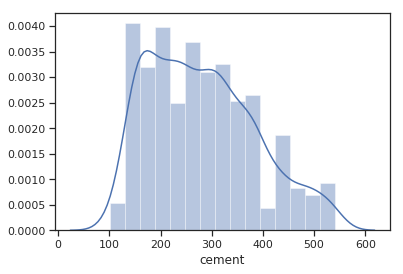

In [263]:
# histogram 
sns.distplot(concrete_data["cement"]);

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


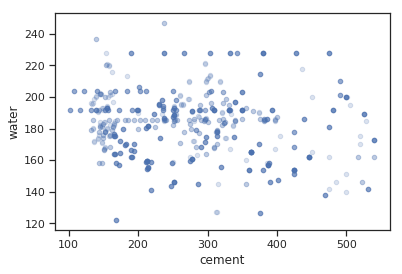

In [264]:
# scatter plot
concrete_data.plot.scatter('cement', 'water', alpha=0.2);

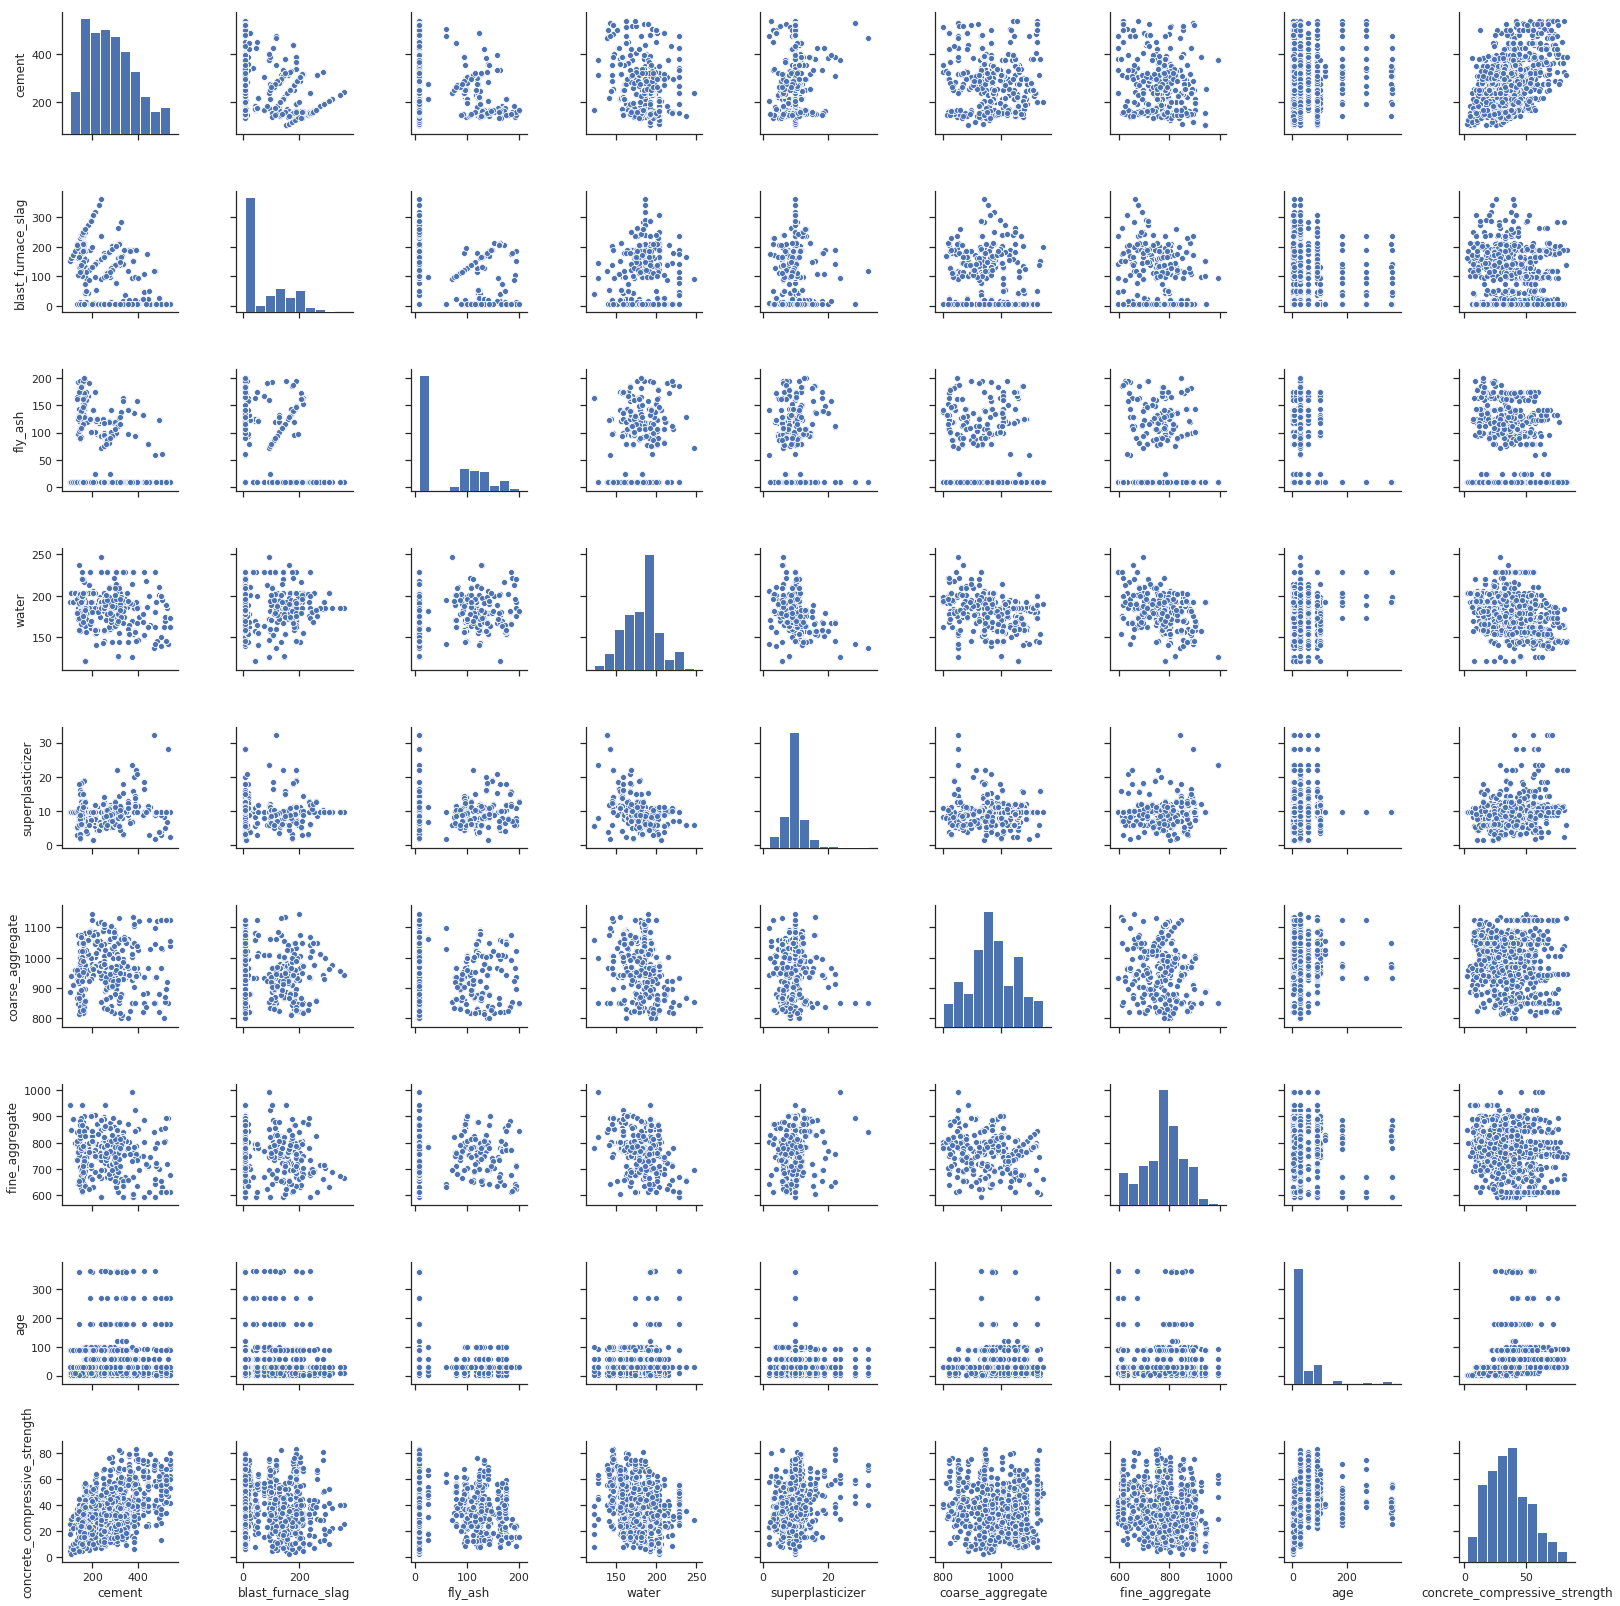

In [266]:
# scatter pair plot
sns.set(style='ticks', color_codes=True)
graph = sns.pairplot(concrete_data)

## Stretch Goals - Other types and sources of data

Not all data comes in a nice single file - for example, image classification involves handling lots of image files. You still will probably want labels for them, so you may have tabular data in addition to the image blobs - and the images may be reduced in resolution and even fit in a regular csv as a bunch of numbers.

If you're interested in natural language processing and analyzing text, that is another example where, while it can be put in a csv, you may end up loading much larger raw data and generating features that can then be thought of in a more standard tabular fashion.

Overall you will in the course of learning data science deal with loading data in a variety of ways. Another common way to get data is from a database - most modern applications are backed by one or more databases, which you can query to get data to analyze. We'll cover this more in our data engineering unit.

How does data get in the database? Most applications generate logs - text files with lots and lots of records of each use of the application. Databases are often populated based on these files, but in some situations you may directly analyze log files. The usual way to do this is with command line (Unix) tools - command lines are intimidating, so don't expect to learn them all at once, but depending on your interests it can be useful to practice.

One last major source of data is APIs: https://github.com/toddmotto/public-apis

API stands for Application Programming Interface, and while originally meant e.g. the way an application interfaced with the GUI or other aspects of an operating system, now it largely refers to online services that let you query and retrieve data. You can essentially think of most of them as "somebody else's database" - you have (usually limited) access.

*Stretch goal* - research one of the above extended forms of data/data loading. See if you can get a basic example working in a notebook. Image, text, or (public) APIs are probably more tractable - databases are interesting, but there aren't many publicly accessible and they require a great deal of setup.

In [0]:
# https://github.com/1Forge/python-forex-quotes
# Library to fetch and parse realtime Forex quotes and convert currencies

import python_forex_quotes

# You can get an API key for free at 1forge.com - Can I?
client = python_forex_quotes.ForexDataClient('YOUR_API_KEY')